In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
total_sales = df['Sales'].sum()
print(f"{round(total_sales, 2)} total sales")

2261536.78 total sales


In [13]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(round(sales_by_region, 2))

Region
West       710219.68
East       669518.73
Central    492646.91
South      389151.46
Name: Sales, dtype: float64


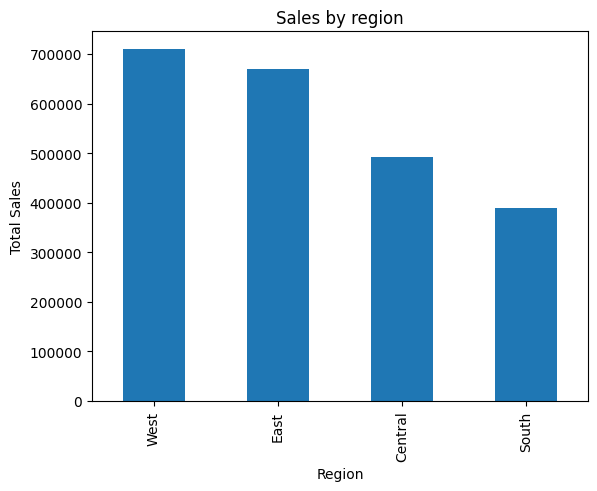

In [14]:
sales_by_region.plot(kind='bar', title = 'Sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


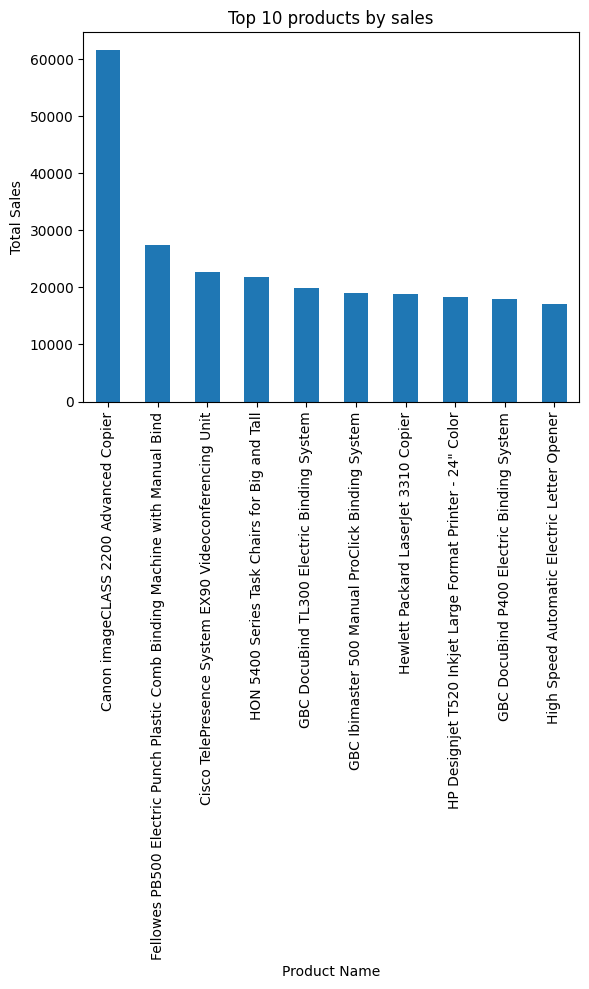

In [ ]:
top_products = (
df.groupby('Product Name')['Sales']
.sum()
.sort_values(ascending=False)
.head(10)
) 
print(top_products)

top_products.plot(kind='bar', title = 'Top 10 products by sales')
plt.xlabel('Product Name')  
plt.ylabel('Total Sales')
plt.show()


Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Name: Sales, dtype: float64


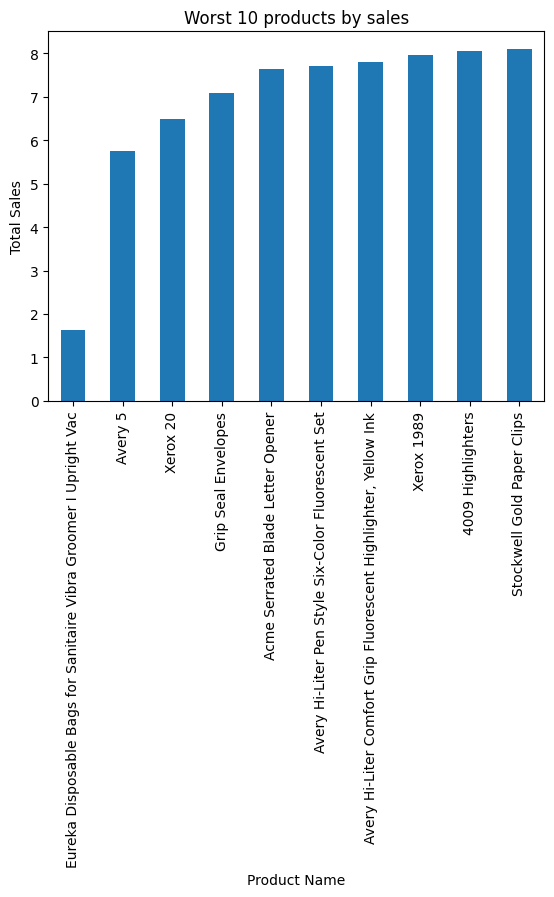

In [18]:
worst_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)
print(worst_products)
worst_products.plot(kind='bar', title = 'Worst 10 products by sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

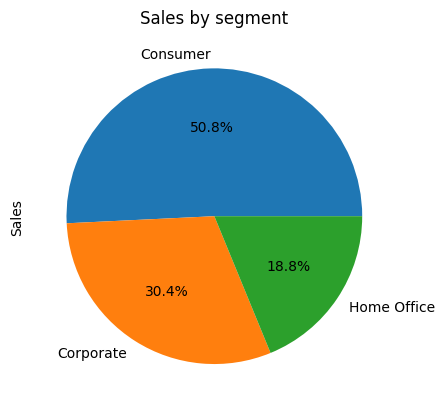

In [19]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()
sales_by_segment.plot(kind='pie', title = 'Sales by segment', autopct='%1.1f%%')
plt.show()

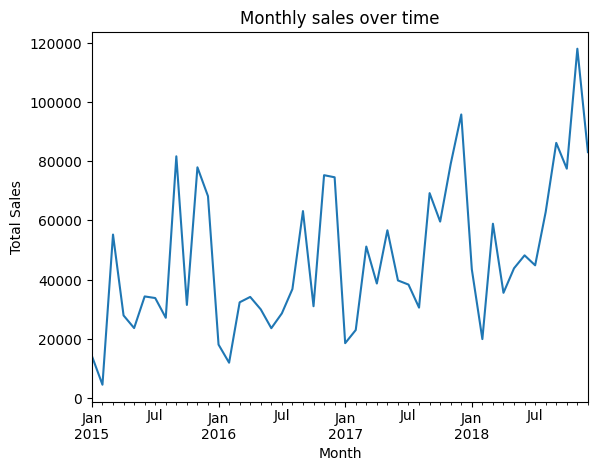

In [20]:
df['Order_Month'] = df['Order Date'].dt.to_period('M')

montyly_sales = df.groupby('Order_Month')['Sales'].sum()
montyly_sales.plot(title = 'Monthly sales over time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

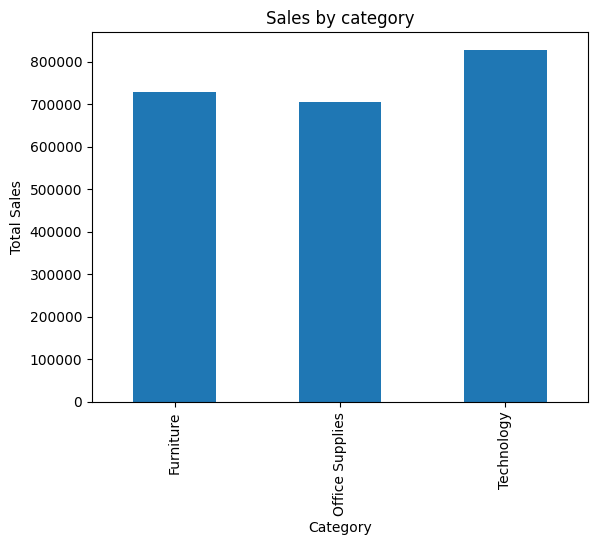

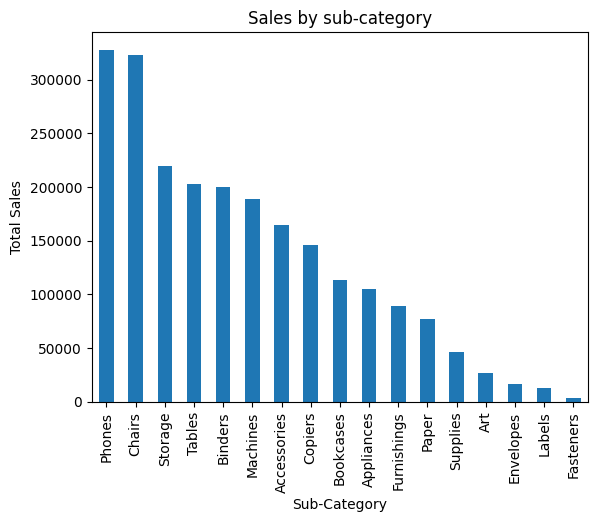

In [22]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', title = 'Sales by category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


sub_category_sales = (
    df.groupby('Sub-Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)
sub_category_sales.plot(kind='bar', title = 'Sales by sub-category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.show()

Segment    Consumer    Corporate  Home Office
Region                                       
Central  250210.522  152031.4968   90404.8944
East     347906.605  195897.4250  125714.6960
South    194702.213  120546.8745   73902.3715
West     355241.191  220018.2785  134960.2150


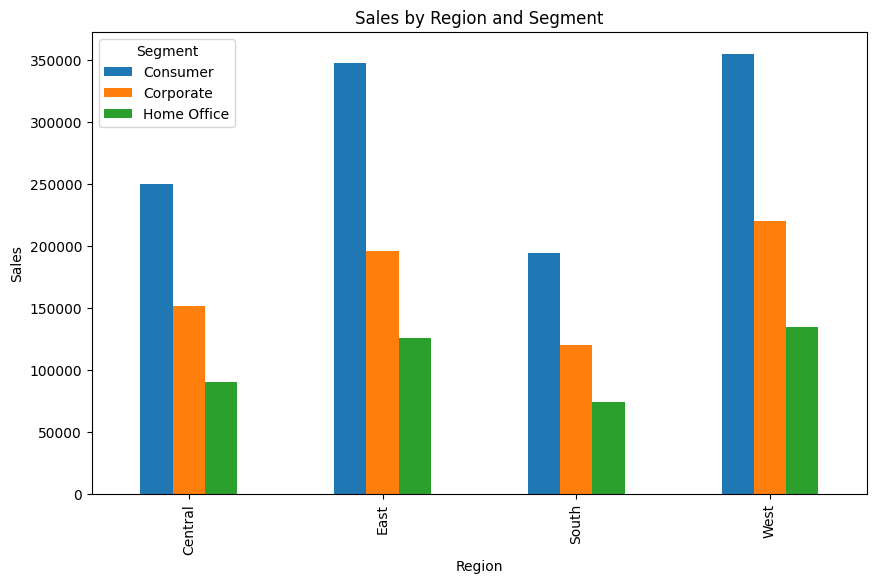

In [25]:
region_segment = (
    df.groupby(['Region', 'Segment'])['Sales']
    .sum()
    .unstack()
    .fillna(0)
)
print(region_segment)

region_segment.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Region and Segment')
plt.ylabel('Sales')
plt.show()